<h1>Redukcja wymiarowości</h1>

Wymiar danych tekstowych jest równy rozmiarowi słownika. Słowa są od siebie zależne (wystepowanie jak i ich kolejność). Warto zastanowić się nad redukcją wymiarowości.

ZADANIE: Wiemy że częste słowa to zwykle stopwordsy które warto usunąć. Można usunąć także rzadkie słowa. Proszę spróbować zrobić tak dla wybranej książki z nltk i zobaczyć jak zmniejszyła się wielkość słownika.



In [84]:
#TODO

ZADANIE: 
Drugą możliwościa jest znalezienie podprzestrzeni najlepiej opisującej dane. Prosze zastosować SVD i zredukować dane do 2 wymiarów.

In [3]:
corpus = ["Romeo and Juliet",
         "Juliet: O happy dagger",
         "Romeo died by dagger",
         "'Live free or die', that’s the New-Hampshire’s motto",
         "Did you know, New-Hampshire is in New-England"]

query = ["dies", "dagger"]

from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize



def my_tokenizer(sent):
    tokens = word_tokenize(sent)
    stemmer = PorterStemmer()
    res = [stemmer.stem(word) for word in tokens]
    return res 


from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer=my_tokenizer, stop_words=stopwords.words('english') + list(string.punctuation))
vectorizer.fit(corpus)
print(vectorizer.vocabulary_)
A = (vectorizer.transform(corpus)).todense()
print(A)



{'romeo': 10, 'juliet': 5, 'happi': 4, 'dagger': 1, 'die': 2, "'live": 0, 'free': 3, '’': 11, 'new-hampshir': 9, 'motto': 7, 'know': 6, 'new-england': 8}
[[0 0 0 0 0 1 0 0 0 0 1 0]
 [0 1 0 0 1 1 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 1 0]
 [1 0 1 1 0 0 0 1 0 1 0 2]
 [0 0 0 0 0 0 1 0 1 1 0 0]]


In [5]:
import numpy as np 
print(A)
U,s,VT = np.linalg.svd(A)
print(s)

[[0 0 0 0 0 1 0 0 0 0 1 0]
 [0 1 0 0 1 1 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 1 0]
 [1 0 1 1 0 0 0 1 0 1 0 2]
 [0 0 0 0 0 0 1 0 1 1 0 0]]
[ 3.05373809  2.15771692  1.68773437  1.38530371  1.11867228]


ZADANIE: Ograniczmy się do 2 pierszych komponentów i narysujmy na płaszczyźnie nasze zdania.

In [6]:
S = np.diag(s)
#print(S)
#print(VT)
#print(U)

n_elements = 2

#reprezentacja dokumentów to po prostu US co jest równowaze XV
docs_red1 = np.matrix(U[:, :n_elements]) * np.diag(s[:n_elements])
docs_red2 = np.matrix(A) * np.matrix(VT.T[:, :n_elements])
print(docs_red1)
print(docs_red2)

docs_red= docs_red1




[[-0.08034651  1.00359682]
 [-0.09131484  1.38149373]
 [-0.49724874  1.28380082]
 [-2.97359423 -0.25944719]
 [-0.47010997 -0.15669539]]
[[-0.08034651  1.00359682]
 [-0.09131484  1.38149373]
 [-0.49724874  1.28380082]
 [-2.97359423 -0.25944719]
 [-0.47010997 -0.15669539]]


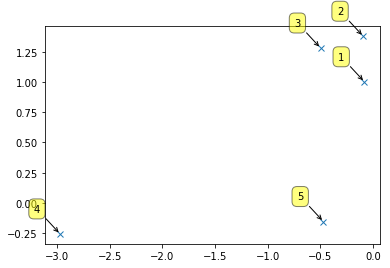

In [7]:
import matplotlib.pyplot as plt


plt.plot(docs_red[:, 0], docs_red[:, 1], 'x')
labels = [1,2,3,4,5]
for label, x, y in zip(labels, docs_red[:, 0], docs_red[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

Jeśli nawet dokumenty nie mają wspólnych słów to mogą znaleźć się blisko siebie w zredukowanej przestrzeni (jeśli tylko mają coś wspólnego z trzecim dokumentem). 



ZADANIE: W zredukowanej przestrzeni można również zaznaczyć query a nawet pojedyncze słowa. Wystarczy potraktować słowo jako dokument i zrzutować. Proszę zaznaczyć słowa.

In [8]:
n_elements = 2
#reconstimg = np.matrix(U[:, :n_elements]) * np.diag(s[:n_elements]) * np.matrix(VT[:n_elements, :])
words_red = np.matrix(np.diag(s[:n_elements]) * np.matrix(VT[:n_elements, :]))
#print("reconst  ", reconstimg)
print("words ", words_red.T) #kazda kolumna to zredukowana reprezentacja kolejnego słowa

#TODO - przerzucić ręcznie słowa i query!!!!

words  [[-0.97375549 -0.12024153]
 [-0.19273545  1.23523828]
 [-1.1365883   0.47473958]
 [-0.97375549 -0.12024153]
 [-0.02990264  0.64025717]
 [-0.05621351  1.10537695]
 [-0.15394574 -0.07262092]
 [-0.97375549 -0.12024153]
 [-0.15394574 -0.07262092]
 [-1.12770123 -0.19286245]
 [-0.18914368  1.06010089]
 [-1.94751098 -0.24048306]]


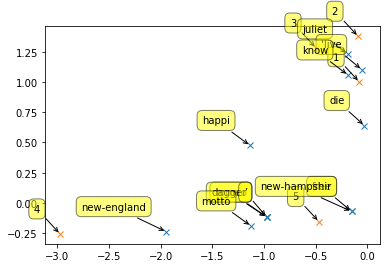

In [9]:
import matplotlib.pyplot as plt

tmp = words_red.T



plt.plot(tmp[:, 0], tmp[:, 1], 'x')
plt.plot(docs_red[:, 0], docs_red[:, 1], 'x')
labels = [1,2,3,4,5]
for label, x, y in zip(labels, docs_red[:, 0], docs_red[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
labels = vectorizer.vocabulary_
for label, x, y in zip(labels, tmp[:, 0], tmp[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

ZADANIE: Proszę wziąć query i zrzutować, a następnie policzyć do jakiego dokumentu jest mu najbliżej w nowej przestrzeni.

In [10]:
query_data = vectorizer.transform(query).todense()
print(query_data)

#TODO

[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]]


<h2>Wstęp do modelowania tematów</h2>

Co tak naprawdę opisują nasze kierunki? Są to pewne kombinacje słów (atrybutów). Im większy współczynnik przy słowie tym ważniejsze słowo. 

Kierunki będziemy traktować jako tematy, które charakteryzują się pewnymi słowami



ZADANIE: Proszę wypisać słowa i ich wagi dla danego kierunku w kolejności malejącej. Wagi słów znajdują się w kolejnych współrzędnych wektorów własnych (components_)

In [33]:
#wypiszmy z czego składają się poszczególne kierunki


# print(corpus)
# print(vectorizer.vocabulary_)
# print(VT)

for i in range(n_elements):
    s = ""
    for val in vectorizer.vocabulary_:
#         print(val, " ",words_red[i,vectorizer.vocabulary_[val]], " ", i)
        s = s + val + "*" + str(VT[i,vectorizer.vocabulary_[val]]) + " + " 
    print(s)
    print()
# print(vectorizer.vocabulary_.keys())
# print(vectorizer.vocabulary_.values())


romeo*-0.0619384083709 + juliet*-0.0184080992365 + happi*-0.00979214403205 + dagger*-0.0631145971985 + die*-0.372195736715 + 'live*-0.318873283548 + free*-0.318873283548 + ’*-0.637746567097 + new-hampshir*-0.369285510834 + motto*-0.318873283548 + know*-0.0504122272853 + new-england*-0.0504122272853 + 

romeo*0.491306751565 + juliet*0.512290066292 + happi*0.296728991945 + dagger*0.572474669163 + die*0.220019400139 + 'live*-0.0557262770784 + free*-0.0557262770784 + ’*-0.111452554157 + new-hampshir*-0.089382647502 + motto*-0.0557262770784 + know*-0.0336563704237 + new-england*-0.0336563704237 + 



ZADANIE: Możemy się zapytać, które dokumenty są podobne do siebie biorąc pod uwagę określony temat (jeden albo kilka). Bierzemy reprezentacje dokumentów w pierwszym temacie


In [39]:
projected = np.dot(A, VT[0,:].T)
projected

matrix([[-0.08034651],
        [-0.09131484],
        [-0.49724874],
        [-2.97359423],
        [-0.47010997]])

In [40]:
projected = np.dot(A, VT[1,:].T)
projected

matrix([[ 1.00359682],
        [ 1.38149373],
        [ 1.28380082],
        [-0.25944719],
        [-0.15669539]])

Teraz zajmiemy się klasyfikacją tekstów - porównamy sobie działanie klasyfikatorów z różnymi opcjami przetwarzania tekstu

Pobieramy 20newsgroups. 

Prosze najpierw pobrać całość. Później zobaczyć co się stanie jak dodamy opcje remove.

In [65]:
to_remove= ('headers', 'footers', 'quotes')

from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='all', shuffle=True)#, remove = to_remove)

Można oczyścić dane np. wziąć tylko tokeny zawierające znaki alfanumeryczne

In [66]:
res = [word_tokenize(raw) for raw in twenty_train.data]

In [77]:
[w for w in res[0] if not w in set(string.punctuation) and w.isalpha()]

['From',
 'Mamatha',
 'Devineni',
 'Ratnam',
 'Subject',
 'Pens',
 'fans',
 'reactions',
 'Organization',
 'Post',
 'Office',
 'Carnegie',
 'Mellon',
 'Pittsburgh',
 'PA',
 'Lines',
 'I',
 'am',
 'sure',
 'some',
 'bashers',
 'of',
 'Pens',
 'fans',
 'are',
 'pretty',
 'confused',
 'about',
 'the',
 'lack',
 'of',
 'any',
 'kind',
 'of',
 'posts',
 'about',
 'the',
 'recent',
 'Pens',
 'massacre',
 'of',
 'the',
 'Devils',
 'Actually',
 'I',
 'am',
 'bit',
 'puzzled',
 'too',
 'and',
 'a',
 'bit',
 'relieved',
 'However',
 'I',
 'am',
 'going',
 'to',
 'put',
 'an',
 'end',
 'to',
 'relief',
 'with',
 'a',
 'bit',
 'of',
 'praise',
 'for',
 'the',
 'Pens',
 'Man',
 'they',
 'are',
 'killing',
 'those',
 'Devils',
 'worse',
 'than',
 'I',
 'thought',
 'Jagr',
 'just',
 'showed',
 'you',
 'why',
 'he',
 'is',
 'much',
 'better',
 'than',
 'his',
 'regular',
 'season',
 'stats',
 'He',
 'is',
 'also',
 'a',
 'lot',
 'fo',
 'fun',
 'to',
 'watch',
 'in',
 'the',
 'playoffs',
 'Bowman',
 's

Spróbujmy teraz dokonać klasyfikacji - weźmy dane z dwóch różnych dziedzin (to będą nasze klasy), nauczmy i przetestujmy klasyfikator. 

Potem spróbujemy na realnych danych np. 20newsgroups. Porównamy różne warianty ze stopwordsami, stemowaniem, bigramami, setofwords itd.

In [1]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='all', shuffle=True)

print(len(twenty_train.data))
# 18846
 
print(len(twenty_train.target_names))
# 20
 
print(twenty_train.target_names)

18846
20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [3]:
twenty_train.data[0]

"From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

Robimy funkcje na ewaluacje klasyfikatora

In [99]:
from sklearn.model_selection import train_test_split
 
def train(classifier, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

    classifier.fit(X_train, y_train)
    print("Accuracy: ", classifier.score(X_test, y_test))
    return classifier

Sprawdzamy NaiveBayes ze standardowymi opcjami vektoryzacji

In [107]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
 
trial1 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB()),
])
 
train(trial1, news.data, news.target)
# Accuracy: 

Accuracy:  0.8397707979626485


Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

Wezmy tfidf

In [100]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
 
trial1 = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB()),
])
 
train(trial1, news.data, news.target)
# Accuracy: 0.846349745331

Accuracy:  0.8463497453310697


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

Usunmy stopwords

In [101]:
from nltk.corpus import stopwords
 
trial2 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))),
    ('classifier', MultinomialNB()),
])
 
train(trial2, news.data, news.target)
# Accuracy: 0.877546689304

Accuracy:  0.8777589134125636


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

Zmienmy alpha paramtr NB

In [102]:
trial3 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))),
    ('classifier', MultinomialNB(alpha=0.05)),
])
 
train(trial3, news.data, news.target)
# Accuracy: 0.909592529711

Accuracy:  0.9102292020373515


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...     vocabulary=None)), ('classifier', MultinomialNB(alpha=0.05, class_prior=None, fit_prior=True))])

Zignorujmy rzadkie slowa (mniej niz 5 razy)

In [103]:

trial4 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'),
                             min_df=5)),
    ('classifier', MultinomialNB(alpha=0.05)),
])
 
train(trial4, news.data, news.target)
# Accuracy: 0.903013582343

Accuracy:  0.9028013582342954


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...     vocabulary=None)), ('classifier', MultinomialNB(alpha=0.05, class_prior=None, fit_prior=True))])

We’ll use NLTK tokenizer to better split the text into words and then let’s bring the words to a base form using a stemmer. We’ll also ignore the punctuation since word_tokenize doesn’t filter them out.

In [106]:
import string
from nltk.stem import PorterStemmer
from nltk import word_tokenize
 
def stemming_tokenizer(text):
    stemmer = PorterStemmer()
    return [stemmer.stem(w) for w in word_tokenize(text)]
 
trial5 = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=stemming_tokenizer,
                             stop_words=stopwords.words('english') + list(string.punctuation))),
    ('classifier', MultinomialNB(alpha=0.05)),
])
 
train(trial5, news.data, news.target)
# Accuracy: 0.910653650255

KeyboardInterrupt: 

In [4]:
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

from __future__ import print_function
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
t0 = time()
dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))
data_samples = dataset.data[:n_samples]
print("done in %0.3fs." % (time() - t0))


# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()



print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)



Loading dataset...
done in 1.428s.
Extracting tf features for LDA...
done in 0.311s.

Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 3.088s.

Topics in LDA model:
Topic #0: edu com mail send graphics ftp pub available contact university list faq ca information cs 1993 program sun uk mit
Topic #1: don like just know think ve way use right good going make sure ll point got need really time doesn
Topic #2: christian think atheism faith pittsburgh new bible radio games alt lot just religion like book read play time subject believe
Topic #3: drive disk windows thanks use card drives hard version pc software file using scsi help does new dos controller 16
Topic #4: hiv health aids disease april medical care research 1993 light information study national service test led 10 page new drug
Topic #5: god people does just good don jesus say israel way life know true fact time law want believe make think
Topic #6: 55 10 11 18 15 team game 19 period play 23 12 13

In [ ]:
print(lda.components_)